In [1]:
import h5py
import pickle
from GNN.inputs import split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from GNN.utils.cm import plot_confusion_matrix
from scipy.stats import binned_statistic

In [2]:
hdf5_filename = '/cosma5/data/dp004/dc-cues1/features/halo_features_s99'

with h5py.File(hdf5_filename,'r+') as feats: 
    
    mass = feats['M200c'][:]
    
    labels = feats['Ngals'][:]


labels = labels > 0 


In [3]:
nbins= 15
bins = np.logspace(np.log10(np.min(mass)),
                   12, nbins+1)


In [4]:
nluminous, edges, _ = binned_statistic(mass, labels, 
                                      statistic = 'mean',
                                      bins = bins)

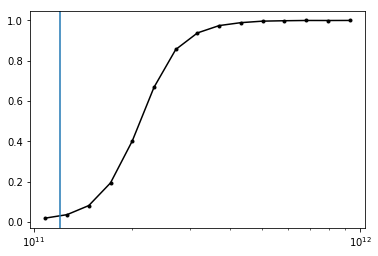

In [5]:
plt.semilogx((edges[1:]+edges[:-1])/2.,
           nluminous,color='black', marker='o',markersize=3)
plt.axvline(x = 1.2e11)

In [15]:
thresholds = np.linspace(1.5e11, 5.e11, 20)

true_rate, false_rate = [], []
for t in thresholds:
    
    #print(f'Mass thresohld = {t:.2E}')
    prediction = mass > t
    
    cm = confusion_matrix(labels, prediction)
    
    #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    true_dark = cm[0,0]
    true_lum = cm[1,1]
    false_dark = cm[0,1]
    false_lum = cm[1,0]
    
    true_rate.append(true_dark/(false_dark + true_dark))
    
    false_rate.append(false_lum/(false_lum + true_dark))
    

    
    #plt.semilogx((edges[1:]+edges[:-1])/2.,
    #       nluminous,color='black', marker='o',markersize=3)
    #plt.axvline(x =t)
    #plt.show()
    #plot_confusion_matrix(labels, prediction, classes = ['Dark', 'Luminous'], normalize = True)
    #plt.show()

Text(0.5,0,'False positive rate')

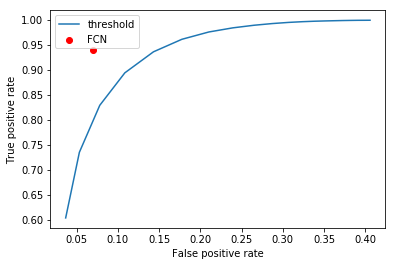

In [28]:
plt.plot(false_rate, true_rate, label = 'threshold')
plt.scatter(false_rate_fcn, true_rate_fcn, color = 'red', label = 'FCN')
plt.legend()
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [24]:
true_dark = 0.94
true_lum = 0.93
false_dark = 0.06
false_lum = 0.07

true_rate_fcn = (true_dark/(false_dark + true_dark))

false_rate_fcn = (false_lum/(false_lum + true_dark))
    

